# VGG16 Layer Visualization

### Start out by printing a summary of the VGG16 model from Keras

In [1]:
from keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### It is pretty clear what the sizes are from the `MaxPooling2D` layers, as we know they are stride 2, but it isn't all bad to have a pretty picture of the sizes too...


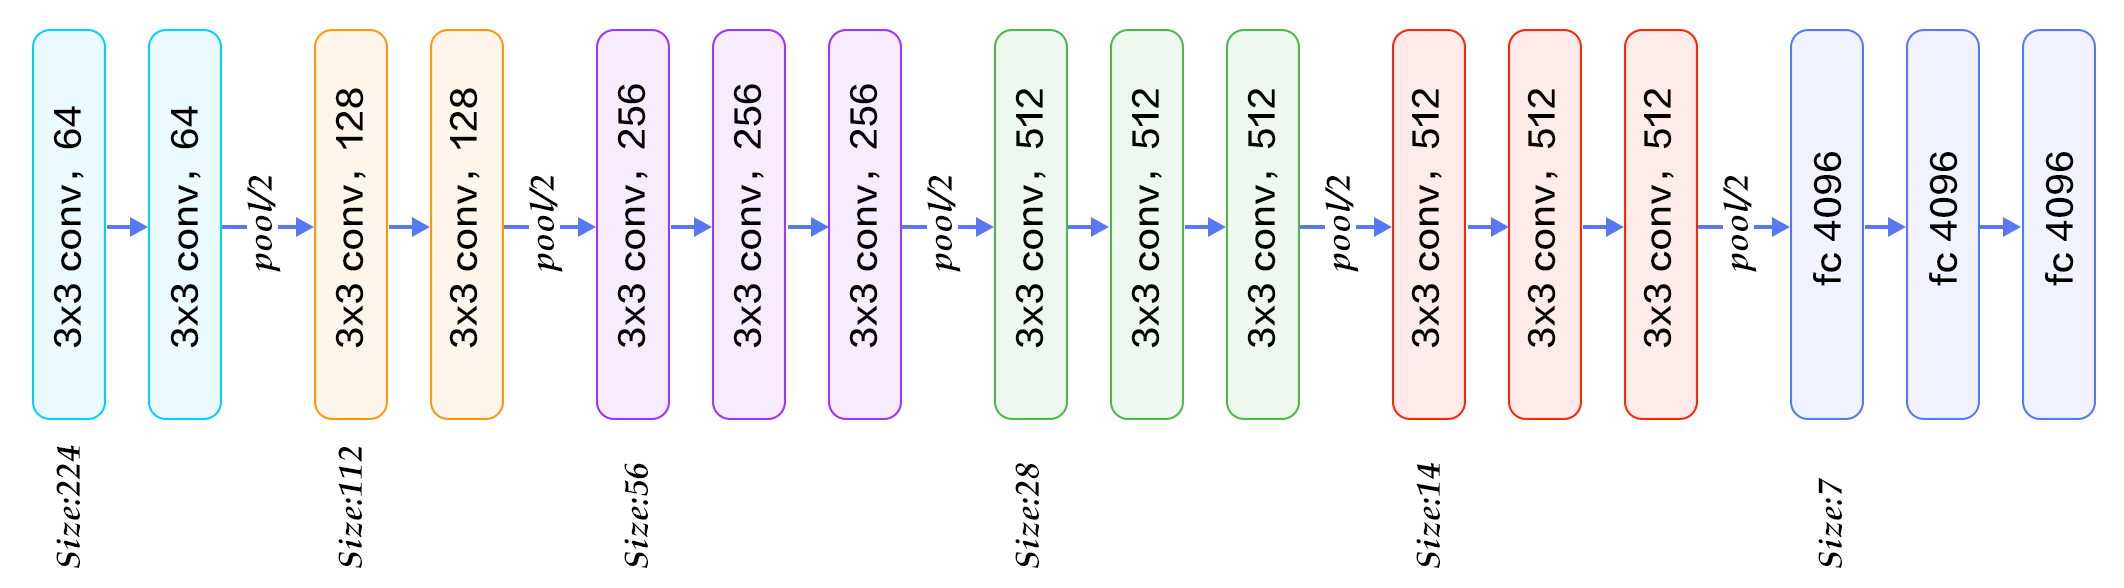

In [3]:
from IPython.display import Image
Image("images/vgg16.png")

### Now we simply need to create a new model with an input layer of relevant size, and attach the internal convolutional layers we want so that we can observe the projection of the layers through the convolutions.

In [27]:
from keras.models import Model
from keras.layers import Input
import numpy as np

data = np.zeros(14*14*512, dtype=np.float32)
data = np.reshape(data, (1,14,14,512))

i = Input(shape=(14,14,512,))
o = vgg16.get_layer('block5_conv1')(i)
#o = vgg16.get_layer('block5_conv2')(o)
#o = vgg16.get_layer('block5_conv3')(o)
m = Model(inputs=[i],outputs=[o])

output = m.predict([data])


### Now we define a plotting function for the many subplots we will have

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_many(data):
    n = int(np.ceil(np.sqrt(len(data))))
    fig, axes = plt.subplots(n, n, figsize=(20,20))
    for i, image in enumerate(data):
        a = axes.flatten()[i]
        a.axis('off')
        #a.imshow(image)
        a.imshow(image, cmap='gray')
    while i < n*n:
        axes.flatten()[i].axis('off')
        i += 1


### We will reshape the data so the plotter will work with it, and plot it.

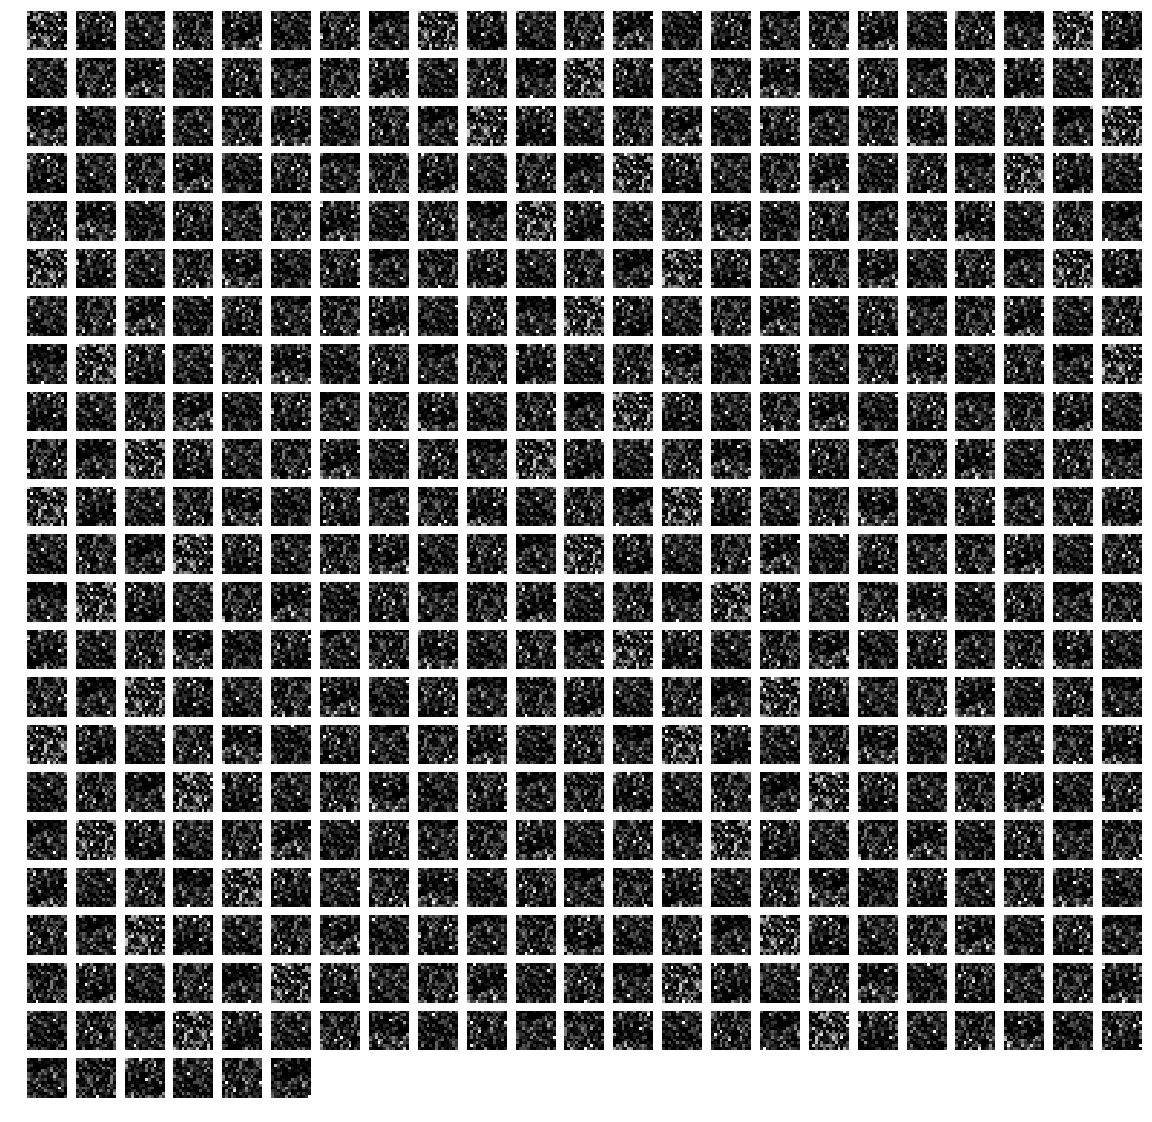

In [29]:
output = np.reshape(output[0], (512,14,14))
plot_many(output)